In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# 2 Island stochastic model

Seulement 2 iles pour le moment, il faudra créer des fonctions plus tard pour étendre a un modèle plus complexe.

In [2]:
# Parameters
birth = 0.5  # Birth rate per adult
puberty = 0.8      # transition rate from egg to adult
mu = 0.5    # rate at which egg becomes a female
egg_death = 0.2     # Death rate per egg
adult_death = 0.2     # Death rate per adult
sterile_death = 0.3   # Death rate per sterile
init_egg = 0  # Starting egg pop1ulation
init_female = 100 # Starting female population
init_male = 5 # Starting adult population
init_sterile = 0 # Starting sterile male population
max_time = 200.0     # Maximum simulation time
comp_egg1 = 1/500 # Carrying capacity
comp_egg2 = 1/100 
immigration_rates = [0, 0.2, 0.1, 0.75, 0, 0.1, 0.05, 0.04]

# Initialize variables
egg_pop1 = init_egg
male_pop1 = init_male
female_pop1 = init_female
sterile_pop1 = init_sterile

egg_pop2 = init_egg
male_pop2 = init_male
female_pop2 = init_female
sterile_pop2 = init_sterile

sterile_hist = 0
t = 0.0
time_history = [t]
pop1 = np.array([egg_pop1, female_pop1, male_pop1, sterile_pop1], dtype=int)
pop2 = np.array([egg_pop2, female_pop2, male_pop2, sterile_pop2], dtype=int)
population_history = [np.concatenate((pop1, pop2))]

In [3]:
def mating(M, Ms):
    return 0.5 * M / (1 + 0.5 * M + 0.4 * Ms)

In [4]:
def release1(M, n):
    return n*M + 1000

In [5]:
while t < max_time and ( pop1[0] + pop1[1] + pop1[2] + pop2[0] + pop2[1] + pop2[2] > 0):
    # Step 1: Calculate total rate
    total_rate1 = (
        birth * mating(pop1[2], pop1[3]) * pop1[1] +
        (egg_death + comp_egg1 * pop1[0]) * pop1[0]+
        adult_death * pop1[2] +
        adult_death * pop1[1] +
        mu * puberty * pop1[0] +
        (1 - mu) * puberty * pop1[0] +
        sterile_death * pop1[3]
    )

    total_rate2 = (
        birth * mating(pop2[2], pop2[3]) * pop2[1] +
        (egg_death + comp_egg2 * pop2[0]) * pop2[0]+
        adult_death * pop2[2] +
        adult_death * pop2[1] +
        mu * puberty * pop2[0] +
        (1 - mu) * puberty * pop2[0] +
        sterile_death * pop2[3]
    )

    immigration_rate = 0

    total_rate = total_rate1 + total_rate2 + immigration_rate
    # Step 2: Draw time to next event
    time_to_next_event = np.random.exponential(1 / total_rate)
    t += time_to_next_event

    # Step 4: Determine the event
    p = np.random.rand()

    if p < (birth * mating(pop1[2], pop1[3]) * pop1[1]) / total_rate:
        pop1[0] += 30
        pop1[1] -= 1
    elif p < (puberty * mu * pop1[0] + birth * mating(pop1[2], pop1[3]) * pop1[1]) / total_rate and pop1[0] > 0:
        pop1[0] -= 1
        pop1[1] += 1
    elif p < (puberty * (1 - mu) * pop1[0] + puberty * mu * pop1[0] + birth * mating(pop1[2], pop1[3]) * pop1[1]) / total_rate and pop1[0] > 0:
        pop1[0] -= 1
        pop1[2] += 1
    elif p < ((egg_death + comp_egg1 * pop1[0]) * pop1[0] + puberty * (1 - mu) * pop1[0] + puberty * mu * pop1[0] + birth * mating(pop1[2], pop1[3]) * pop1[1]) / total_rate and pop1[0] > 0:
        pop1[0] -= 1
    elif p < (adult_death * pop1[1] + (egg_death + comp_egg1 * pop1[0]) * pop1[0]  + puberty * (1 - mu) * pop1[0] + puberty * mu * pop1[0] + birth * mating(pop1[2], pop1[3]) * pop1[1]) / total_rate:
        pop1[1] -= 1
    elif p < (adult_death * (pop1[1] + pop1[2]) + (egg_death + comp_egg1 * pop1[0]) * pop1[0]  + puberty * (1 - mu) * pop1[0] + puberty * mu * pop1[0] + birth  * mating(pop1[2], pop1[3]) * pop1[1]) / total_rate:
        pop1[2] -= 1
    elif p < total_rate1 / total_rate:
        pop1[3] -= 1

    elif p < (birth * mating(pop2[2], pop2[3]) * pop2[1] + total_rate1) / total_rate:
        pop2[0] += 30
        pop2[1] -= 1
    elif p < (puberty * mu * pop2[0] + birth * mating(pop2[2], pop2[3]) * pop2[1] + total_rate1) / total_rate and pop2[0] > 0:
        pop2[0] -= 1
        pop2[1] += 1
    elif p < (puberty * (1 - mu) * pop2[0] + puberty * mu * pop2[0] + birth * mating(pop2[2], pop2[3]) * pop2[1] + total_rate1) / total_rate and pop2[0] > 0:
        pop2[0] -= 1
        pop2[2] += 1
    elif p < ((egg_death + comp_egg2 * pop2[0]) * pop2[0] + puberty * (1 - mu) * pop2[0] + puberty * mu * pop2[0] + birth * mating(pop2[2], pop2[3]) * pop2[1] + total_rate1) / total_rate and pop2[0] > 0:
        pop2[0] -= 1
    elif p < (adult_death * pop2[1] + (egg_death + comp_egg2 * pop2[0]) * pop2[0]  + puberty * (1 - mu) * pop2[0] + puberty * mu * pop2[0] + birth * mating(pop2[2], pop2[3]) * pop2[1] + total_rate1) / total_rate:
        pop2[1] -= 1
    elif p < (adult_death * (pop2[1] + pop2[2]) + (egg_death + comp_egg2 * pop2[0]) * pop2[0]  + puberty * (1 - mu) * pop2[0] + puberty * mu * pop2[0] + birth  * mating(pop2[2], pop2[3]) * pop2[1] + total_rate1) / total_rate:
        pop2[2] -= 1
    elif p < (total_rate1 + total_rate2) / total_rate:
        pop2[3] -= 1

    #elif p < ( + total_rate1 + total_rate2)/total_rate: 

    # Step 3: Sterile insect release
    if int(t) % 7 == 0 and (len(time_history) == 0 or int(time_history[-1]) != int(t)) and t > 40:
        pop1[3] += release1(pop1[2], 100)
        pop2[3] += release1(pop2[2], 100)

    # Step 5: Record history
    time_history.append(t)
    population_history.append((pop1[0], pop1[1], pop1[2], pop1[3], pop2[0], pop2[1], pop2[2], pop2[3]))


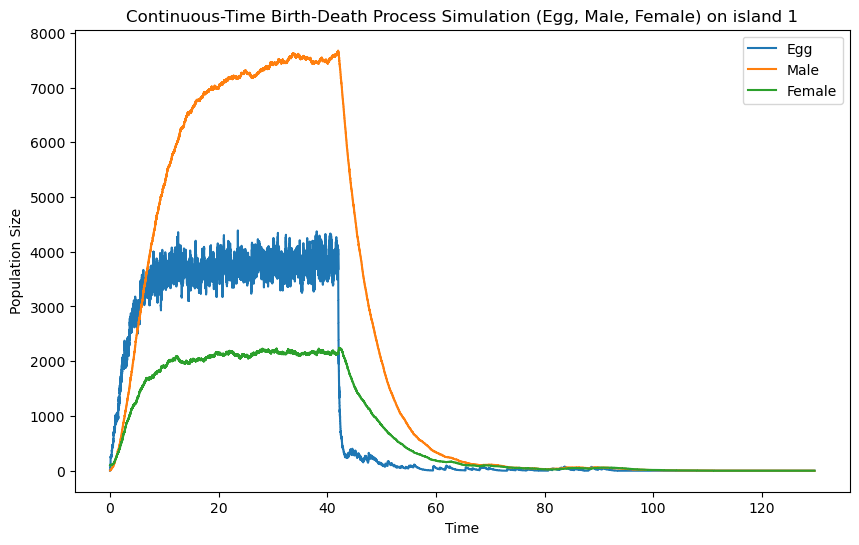

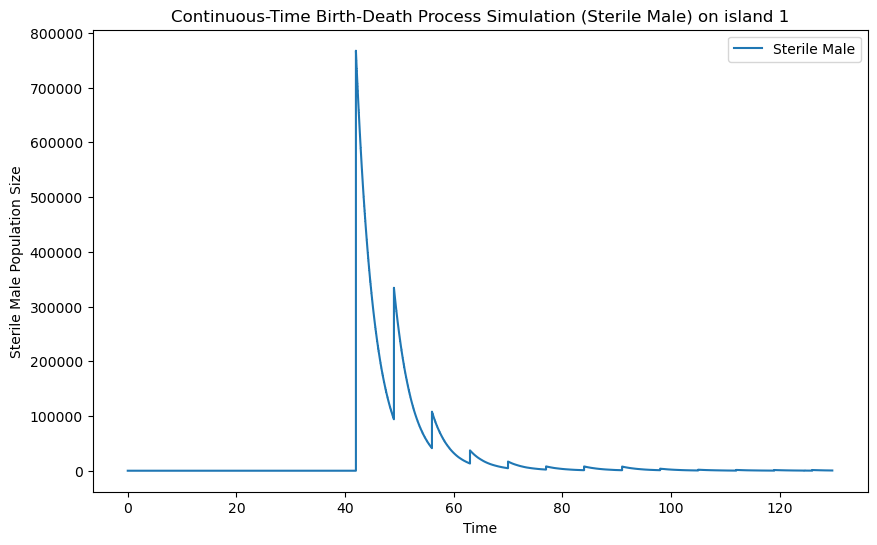

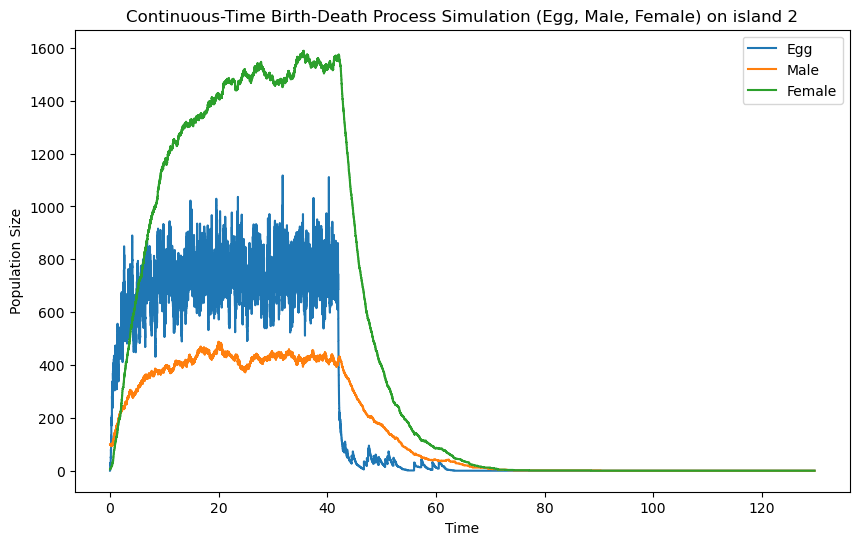

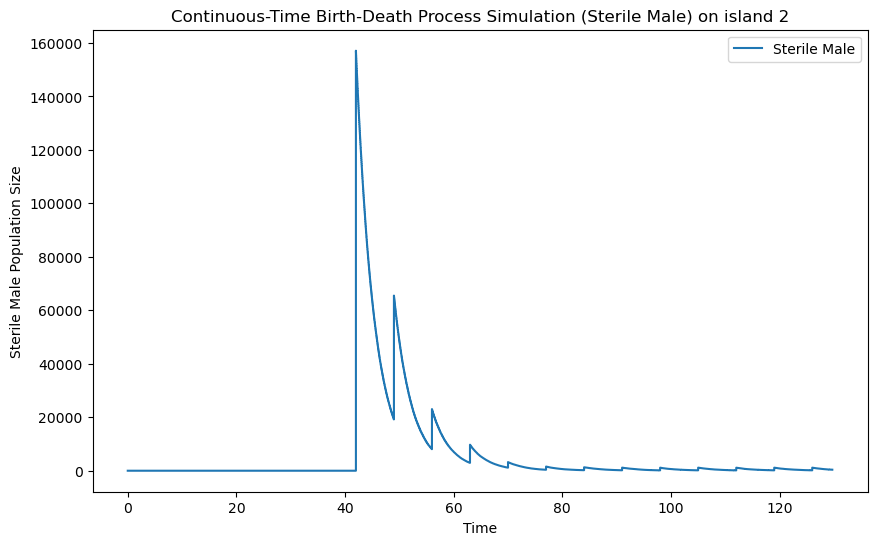

In [6]:

# Plot results for male, female, and egg population
plt.figure(figsize=(10, 6))
plt.step(time_history, [k[0] for k in population_history], where="post", label='Egg')
plt.step(time_history, [k[2] for k in population_history], where="post", label='Male')
plt.step(time_history, [k[1] for k in population_history], where="post", label='Female')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Continuous-Time Birth-Death Process Simulation (Egg, Male, Female) on island 1')
plt.legend()
plt.show()

# Plot results for sterile male population
plt.figure(figsize=(10, 6))
plt.step(time_history, [k[3] for k in population_history], where="post", label='Sterile Male')
plt.xlabel('Time')
plt.ylabel('Sterile Male Population Size')
plt.title('Continuous-Time Birth-Death Process Simulation (Sterile Male) on island 1')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.step(time_history, [k[4] for k in population_history], where="post", label='Egg')
plt.step(time_history, [k[5] for k in population_history], where="post", label='Male')
plt.step(time_history, [k[6] for k in population_history], where="post", label='Female')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Continuous-Time Birth-Death Process Simulation (Egg, Male, Female) on island 2')
plt.legend()
plt.show()

# Plot results for sterile male population
plt.figure(figsize=(10, 6))
plt.step(time_history, [k[7] for k in population_history], where="post", label='Sterile Male')
plt.xlabel('Time')
plt.ylabel('Sterile Male Population Size')
plt.title('Continuous-Time Birth-Death Process Simulation (Sterile Male) on island 2')
plt.legend()
plt.show()
